In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from math import *
import numpy as np

In [2]:
k1 = 1.38   # W/(m*K)
k2 = 1.3
k3 = 1.3

c1 = 880 # J/(kg*K)
c2 = 880
c3 = 700

rho1 = 2300 # kg/m^3
rho2 = 2400
rho3 = 2000

L1 = 0.12  # m
L2 = 0.23
L3 = 0.076

beta1 = 1922 # degrees K

h = 20 # W/(m^2*K)
Te = 422

# initial temperatures
T_0 = np.array([300, 300, 300, 300]) # degrees K

A = 0.19 # m^2

delta_t = 2000  # sec
end_time = 300000

In [3]:
K = A*np.array([[1/A, 0, 0, 0],
                [-k1/L1, k1/L1+k2/L2, -k2/L2, 0],
                [0, -k2/L2, k2/L2+k3/L3, -k3/L3],
                [0, 0, -k3/L3, k3/L3+h]])
R = np.array([beta1,
              0,
              0,
              h*A*Te])

C = 0.5*A*np.diag([rho1*c1*L1, rho1*c1*L1+rho2*c2*L2, rho2*c2*L2+rho3*c3*L3, rho3*c3*L3])

In [4]:
# calculate steady state solution
ss_solution = np.linalg.inv(K) @ R
print(ss_solution)

[1922.         1571.69011048  858.94421989  623.42818647]


In [5]:
C_inv = np.linalg.inv(C)

time = np.arange(0.0, end_time, delta_t)

transient_solution = []

transient_solution.append(T_0)

for t in time[1:]:
    r_bar = (C-delta_t*K) @ transient_solution[-1] + delta_t*R
    transient_solution.append( C_inv @ r_bar)
    
transient_solution = np.array(transient_solution)
    

Text(0.5, 1.0, 'Temperature vs. Time')

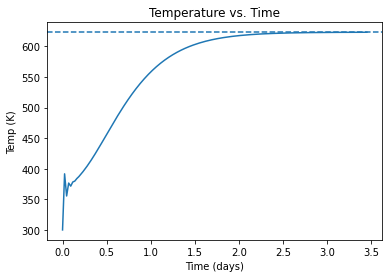

In [6]:
# plot temperature of last node versus time
plt.plot(time*(1/(60*60*24)),transient_solution[:,-1])
plt.axhline(ss_solution[3],linestyle='--')

plt.xlabel('Time (days)')
plt.ylabel('Temp (K)')
plt.title('Temperature vs. Time')